In [74]:
import pandas as pd
import cobra
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import linprog
import scipy
import mip
from copy import deepcopy

import warnings
warnings.filterwarnings('ignore')

import json
def save_dict(data, name):
    with open(name, 'w' ) as file:
        json.dump( data, file )

# Community modeling

In this notebook we will implement a method to create community models of two or more species specific metabolic models using cobrapy.

In [75]:
model_DP = cobra.io.read_sbml_model("models/consistent_DP_SNM.xml")
model_SA = cobra.io.read_sbml_model("models/consistent_iYS854_SNM.xml")
print("Growth: ", model_DP.slim_optimize())
print("Growth: ", model_SA.slim_optimize())

Growth:  0.2823653925322476
Growth:  2.558694612613393


In [76]:
for rec in model_SA.reactions:
    rec.lower_bound = max(rec.lower_bound, -1000)
    rec.upper_bound = min(rec.upper_bound, 1000)

In [77]:
import json
compm_SA = json.loads(open("compm_SA.json").read())
compm_DP = json.loads(open("compm_DP.json").read())
compm = compm_SA.copy()
for key in compm_DP:
    if not key in compm:
        compm[key] = compm_DP[key]


In [78]:
BIOMASS_DP = "Growth" 
BIOMASS_SA = "BIOMASS_iYS_wild_type"
models = [model_DP.copy(), model_SA.copy()]

## Community model growths on SNM3 medium


In [79]:
from community_models import *

In [80]:
model1 = Model(model_DP, BIOMASS_DP)
model2 = Model(model_SA, BIOMASS_SA)
shuttle_community_model = MIP_community_model(model1, model2)

In [84]:
print(shuttle_community_model)

In [44]:
alphas = np.linspace(0,1,101)
growths_DP = []
growths_SA = []
for alpha in alphas:
    shuttle_community_model.reset_model()
    shuttle_community_model.set_medium(compm)
    shuttle_community_model.weights = [alpha,1-alpha]
    shuttle_community_model.optimize()
    growths_DP.append(shuttle_community_model.x1[shuttle_community_model.obj1])
    growths_SA.append(shuttle_community_model.x2[shuttle_community_model.obj2])

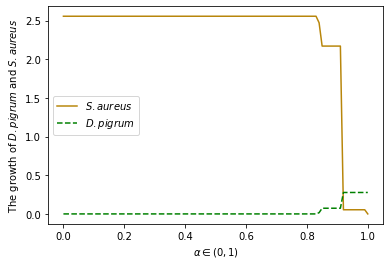

In [45]:
title_font = {'fontname':'Arial', 'size':'14', 'color':'black', 'weight':'normal'} 
plt.xlabel(r"$\alpha\in (0,1)$")
plt.ylabel('The growth of $\it{D. pigrum}$ and $\it{S.aureus}$')
plt.plot(alphas, growths_SA, 'darkgoldenrod')
plt.plot(alphas, growths_DP, 'g--')
plt.legend(["$\it{S.aureus}$" , "$\it{D. pigrum}$"])
plt.savefig("COMPM_max_plot_RM.pdf", bbox_inches='tight', dpi=1000)

In [46]:
shuttle_community_model.reset_model()
shuttle_community_model.weights = [0.85,0.15]
shuttle_community_model.set_medium(compm)
COOPM = shuttle_community_model.compute_coopm(enforce_survival=False)

In [47]:
alphas = np.linspace(0,1,101)
growths_DP = []
growths_SA = []
for alpha in alphas:
    shuttle_community_model.reset_model()
    shuttle_community_model.set_medium(COOPM)
    shuttle_community_model.weights = [alpha,1-alpha]
    shuttle_community_model.optimize()
    growths_DP.append(shuttle_community_model.x1[shuttle_community_model.obj1])
    growths_SA.append(shuttle_community_model.x2[shuttle_community_model.obj2])

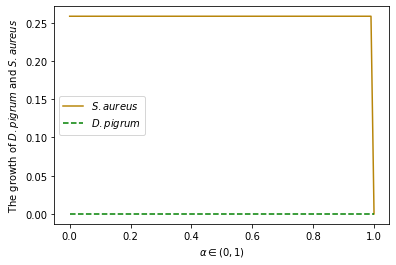

In [48]:
title_font = {'fontname':'Arial', 'size':'14', 'color':'black', 'weight':'normal'} 
plt.xlabel(r"$\alpha\in (0,1)$")
plt.ylabel('The growth of $\it{D. pigrum}$ and $\it{S.aureus}$')
plt.plot(alphas, growths_SA, 'darkgoldenrod')
plt.plot(alphas, growths_DP, 'g--')
plt.legend(["$\it{S.aureus}$" , "$\it{D. pigrum}$"])
plt.savefig("COOPM_precomputed_0.85_0.15_RM.pdf", bbox_inches='tight', dpi=1000)

In [49]:
shuttle_community_model.reset_model()
shuttle_community_model.weights = [0.85,0.15]
shuttle_community_model.set_medium(compm)
COOPM = shuttle_community_model.compute_coopm(enforce_survival=True)

In [50]:
alphas = np.linspace(0,1,101)
growths_DP = []
growths_SA = []
for alpha in alphas:
    shuttle_community_model.reset_model()
    shuttle_community_model.set_medium(COOPM)
    shuttle_community_model.weights = [alpha,1-alpha]
    shuttle_community_model.optimize()
    growths_DP.append(shuttle_community_model.x1[shuttle_community_model.obj1])
    growths_SA.append(shuttle_community_model.x2[shuttle_community_model.obj2])

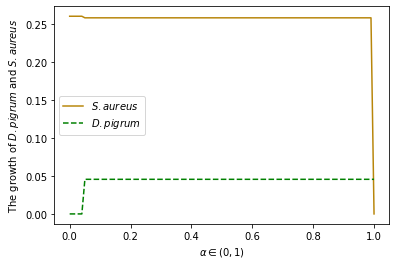

In [51]:
title_font = {'fontname':'Arial', 'size':'14', 'color':'black', 'weight':'normal'} 
plt.xlabel(r"$\alpha\in (0,1)$")
plt.ylabel('The growth of $\it{D. pigrum}$ and $\it{S.aureus}$')
plt.plot(alphas, growths_SA, 'darkgoldenrod')
plt.plot(alphas, growths_DP, 'g--')
plt.legend(["$\it{S.aureus}$" , "$\it{D. pigrum}$"])
plt.savefig("COOPM_precomputed_0.85_0.15_enforce_survival_RM.pdf", bbox_inches='tight', dpi=1000)

In [52]:
shuttle_community_model.reset_model()
shuttle_community_model.weights = [1,1]
shuttle_community_model.set_medium(compm)
COOPM = shuttle_community_model.compute_coopm(enforce_survival=True)

In [53]:
alphas = np.linspace(0,1,101)
growths_DP = []
growths_SA = []
for alpha in alphas:
    shuttle_community_model.reset_model()
    shuttle_community_model.set_medium(COOPM)
    shuttle_community_model.weights = [alpha,1-alpha]
    shuttle_community_model.optimize()
    growths_DP.append(shuttle_community_model.x1[shuttle_community_model.obj1])
    growths_SA.append(shuttle_community_model.x2[shuttle_community_model.obj2])

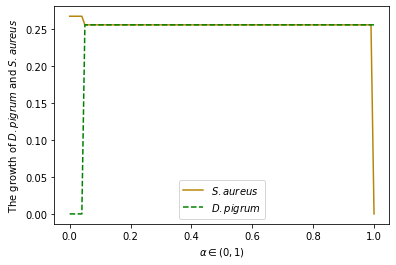

In [54]:
title_font = {'fontname':'Arial', 'size':'14', 'color':'black', 'weight':'normal'} 
plt.xlabel(r"$\alpha\in (0,1)$")
plt.ylabel('The growth of $\it{D. pigrum}$ and $\it{S.aureus}$')
plt.plot(alphas, growths_SA, 'darkgoldenrod')
plt.plot(alphas, growths_DP, 'g--')
plt.legend(["$\it{S.aureus}$" , "$\it{D. pigrum}$"])
plt.savefig("COOPM_precomputed_1_1_enforce_survival_RM.pdf", bbox_inches='tight', dpi=1000)


In [55]:
shuttle_community_model.reset_model()
shuttle_community_model.weights = [10,1]
shuttle_community_model.set_medium(compm)
COOPM = shuttle_community_model.compute_coopm(enforce_survival=True)

In [56]:
alphas = np.linspace(0,1,101)
growths_DP = []
growths_SA = []
for alpha in alphas:
    shuttle_community_model.reset_model()
    shuttle_community_model.set_medium(COOPM)
    shuttle_community_model.weights = [alpha,1-alpha]
    shuttle_community_model.optimize()
    growths_DP.append(shuttle_community_model.x1[shuttle_community_model.obj1])
    growths_SA.append(shuttle_community_model.x2[shuttle_community_model.obj2])

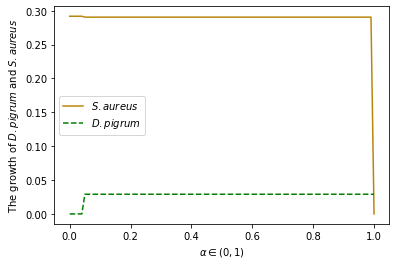

In [57]:
title_font = {'fontname':'Arial', 'size':'14', 'color':'black', 'weight':'normal'} 
plt.xlabel(r"$\alpha\in (0,1)$")
plt.ylabel('The growth of $\it{D. pigrum}$ and $\it{S.aureus}$')
plt.plot(alphas, growths_SA, 'darkgoldenrod')
plt.plot(alphas, growths_DP, 'g--')
plt.legend(["$\it{S.aureus}$" , "$\it{D. pigrum}$"])
plt.savefig("COOPM_precomputed_10_1_enforce_survival_RM.pdf", bbox_inches='tight', dpi=1000)

In [58]:
shuttle_community_model.reset_model()
shuttle_community_model.weights = [100,1]
shuttle_community_model.set_medium(compm)
COOPM = shuttle_community_model.compute_coopm(enforce_survival=False)

In [59]:
alphas = np.linspace(0,1,101)
growths_DP = []
growths_SA = []
for alpha in alphas:
    shuttle_community_model.reset_model()
    shuttle_community_model.set_medium(COOPM)
    shuttle_community_model.weights = [alpha,1-alpha]
    shuttle_community_model.optimize()
    growths_DP.append(shuttle_community_model.x1[shuttle_community_model.obj1])
    growths_SA.append(shuttle_community_model.x2[shuttle_community_model.obj2])

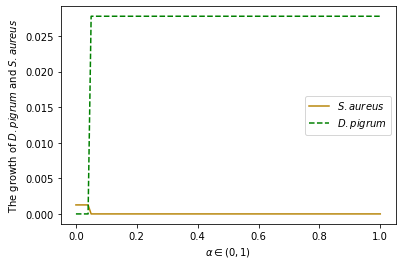

In [60]:
title_font = {'fontname':'Arial', 'size':'14', 'color':'black', 'weight':'normal'} 
plt.xlabel(r"$\alpha\in (0,1)$")
plt.ylabel('The growth of $\it{D. pigrum}$ and $\it{S.aureus}$')
plt.plot(alphas, growths_SA, 'darkgoldenrod')
plt.plot(alphas, growths_DP, 'g--')
plt.legend(["$\it{S.aureus}$" , "$\it{D. pigrum}$"])
plt.savefig("COOPM_precomputed_100_1_RM.pdf", bbox_inches='tight', dpi=1000)

In [61]:
alphas = np.linspace(0,1,101)
growths_DP = []
growths_SA = []
for alpha in alphas:
    shuttle_community_model.reset_model()
    shuttle_community_model.weights = [alpha,1-alpha]
    shuttle_community_model.set_medium(compm)
    try:
        COOPM = shuttle_community_model.compute_coopm(enforce_survival=False)
    except:
        growths_DP.append(growths_DP[-1])
        growths_SA.append(growths_SA[-1])
        continue
    shuttle_community_model.set_medium(COOPM)
    shuttle_community_model.optimize()
    growths_DP.append(shuttle_community_model.x1[shuttle_community_model.obj1])
    growths_SA.append(shuttle_community_model.x2[shuttle_community_model.obj2])

In [62]:
plt.savefig("COOPM_online_RM.pdf")

<Figure size 432x288 with 0 Axes>

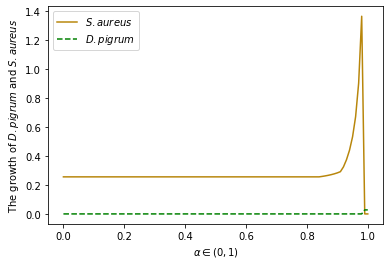

In [63]:
title_font = {'fontname':'Arial', 'size':'14', 'color':'black', 'weight':'normal'} 
plt.xlabel(r"$\alpha\in (0,1)$")
plt.ylabel('The growth of $\it{D. pigrum}$ and $\it{S.aureus}$')
plt.plot(alphas, growths_SA, 'darkgoldenrod')
plt.plot(alphas, growths_DP, 'g--')
plt.legend(["$\it{S.aureus}$" , "$\it{D. pigrum}$"])
plt.savefig("COOPM_mix_plot_RM.pdf", bbox_inches='tight', dpi=1000)